### 1) Try different thresholds for computing predictions. By default it is 0.5. Use predict_proba function to compute probabilities and then try custom thresholds and see their impact on Accuracy, Precision and Recall

##### When Threshold is 0.3

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

glass = pd.read_csv(r'C:\Users\HP\Downloads\glass.csv')
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [38]:
glass['household'] = glass.Type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.household.value_counts()

0    163
1     51
Name: household, dtype: int64

In [39]:
glass.sort_values( by = 'Al', inplace=True)
X = np.array(glass.Al).reshape(-1,1)
y = glass.household

In [13]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X,y)
proba = logreg.predict_proba(X)

threshold = 0.3
pred = (proba[:,1]>=threshold).astype(int)
logreg.coef_, logreg.intercept_

(array([[3.11517927]]), array([-6.00934605]))

Text(0, 0.5, 'household')

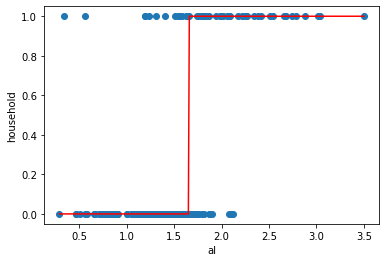

In [15]:
glass.sort_values( by = 'Al', inplace=True)

plt.scatter(glass.Al, glass.household)
plt.plot(glass.Al, pred, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [16]:
glass['household_pred_prob'] = logreg.predict_proba(X)[:, 1]

In [17]:
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,household,household_pred_prob
21,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.00,0.00,1,0,0.006024
184,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.00,0.00,6,1,0.007032
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.00,0.00,1,0,0.010506
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.00,0.00,1,0,0.010506
50,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.00,0.16,1,0,0.011884
...,...,...,...,...,...,...,...,...,...,...,...,...
192,1.51623,14.20,0.00,2.79,73.46,0.04,9.04,0.40,0.09,7,1,0.935956
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7,1,0.950845
172,1.51321,13.00,0.00,3.02,70.70,6.21,6.93,0.00,0.00,5,1,0.967657
171,1.51316,13.02,0.00,3.04,70.48,6.21,6.96,0.00,0.00,5,1,0.969552


Text(0, 0.5, 'household')

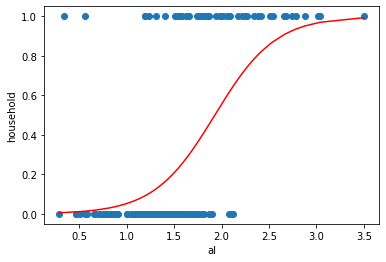

In [18]:
# Plot the predicted probabilities.
plt.scatter(glass.Al, glass.household)
plt.plot(glass.Al, glass.household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print(accuracy_score(y_true=y, y_pred=pred))
print(precision_score(y_true=y, y_pred=pred))
print(recall_score(y,pred))

0.8644859813084113
0.72
0.7058823529411765


###### When Threshold is 0.65

In [21]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X,y)
proba = logreg.predict_proba(X)

threshold = 0.65
pred = (proba[:,1]>=threshold).astype(int)
logreg.coef_, logreg.intercept_

(array([[3.11517927]]), array([-6.00934605]))

Text(0, 0.5, 'household')

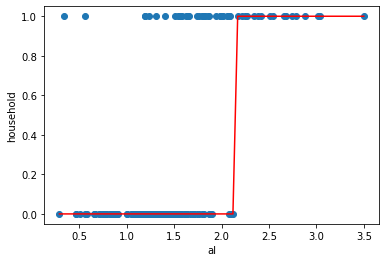

In [22]:
glass.sort_values( by = 'Al', inplace=True)

plt.scatter(glass.Al, glass.household)
plt.plot(glass.Al, pred, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [23]:
glass['household_pred_prob'] = logreg.predict_proba(X)[:, 1]

Text(0, 0.5, 'household')

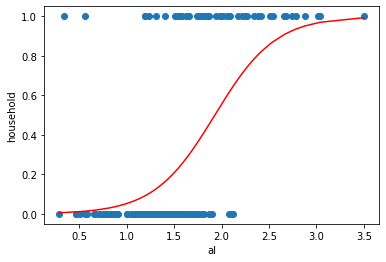

In [24]:
# Plot the predicted probabilities.
plt.scatter(glass.Al, glass.household)
plt.plot(glass.Al, glass.household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print(accuracy_score(y_true=y, y_pred=pred))
print(precision_score(y_true=y, y_pred=pred))
print(recall_score(y,pred))

0.8411214953271028
1.0
0.3333333333333333


### 2. Do the same analysis for other columns

#### For NA

In [30]:
glass.sort_values( by = 'Na', inplace=True)
X = np.array(glass.Na).reshape(-1,1)
y = glass.household

In [31]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X,y)
pred = logreg.predict(X)
logreg.coef_, logreg.intercept_

(array([[1.55119327]]), array([-22.24455281]))

Text(0, 0.5, 'household')

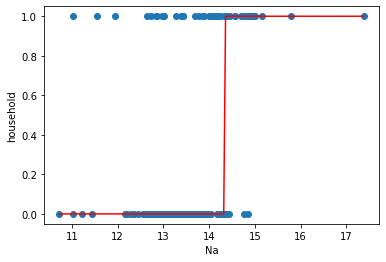

In [32]:
glass.sort_values( by = 'Na', inplace=True)

plt.scatter(glass.Na, glass.household)
plt.plot(glass.Na, pred, color='red')
plt.xlabel('Na')
plt.ylabel('household')

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print(accuracy_score(y_true=y, y_pred=pred))
print(precision_score(y_true=y, y_pred=pred))
print(recall_score(y,pred))

0.8551401869158879
0.8571428571428571
0.47058823529411764


#### For Si

0.7616822429906542
0.0
0.0


C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


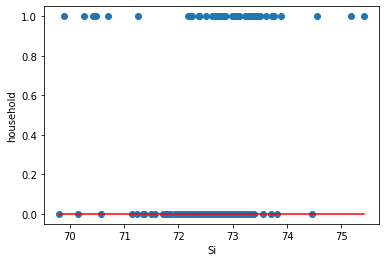

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

glass = pd.read_csv(r'C:\Users\HP\Downloads\glass.csv')

glass['household'] = glass.Type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})

glass.sort_values(by = 'Si', inplace=True)
X = np.array(glass.Si).reshape(-1,1)
y = glass.household

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X,y)
pred = logreg.predict(X)

glass.sort_values( by = 'Si', inplace=True)

plt.scatter(glass.Si, glass.household)
plt.plot(glass.Si, pred, color='red')
plt.xlabel('Si')
plt.ylabel('household')

from sklearn.metrics import accuracy_score, precision_score, recall_score
print(accuracy_score(y_true=y, y_pred=pred))
print(precision_score(y_true=y, y_pred=pred))
print(recall_score(y,pred))

Text(0, 0.5, 'household')

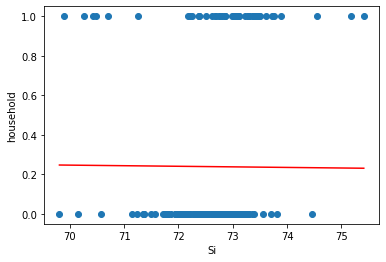

In [58]:
# Plot the predicted probabilities.
plt.scatter(glass.Si, glass.household)
plt.plot(glass.Si, logreg.predict_proba(X)[:, 1], color='red')
plt.xlabel('Si')
plt.ylabel('household')

In [55]:
logreg.predict_proba(X)[:, 1]

array([0.24733894, 0.24710165, 0.24630193, 0.24600618, 0.24550396,
       0.24535638, 0.24509088, 0.24470773, 0.24338457, 0.24312052,
       0.24309119, 0.24279806, 0.24276876, 0.24276876, 0.2423588 ,
       0.242154  , 0.24171555, 0.24162792, 0.24159871, 0.24159871,
       0.24156951, 0.24156951, 0.24154031, 0.24151112, 0.24151112,
       0.24145273, 0.24145273, 0.24127763, 0.24107345, 0.24104429,
       0.24101514, 0.24101514, 0.24092768, 0.24092768, 0.24092768,
       0.24086939, 0.24084025, 0.24084025, 0.24078197, 0.24072371,
       0.24066545, 0.24066545, 0.24054897, 0.24049074, 0.24037431,
       0.24037431, 0.24034521, 0.24034521, 0.24031611, 0.24025792,
       0.24025792, 0.24017066, 0.24014157, 0.24008341, 0.24008341,
       0.23996712, 0.23993805, 0.23993805, 0.23990899, 0.23985087,
       0.23982181, 0.23979275, 0.23979275, 0.23979275, 0.2397637 ,
       0.23973465, 0.23961848, 0.23958944, 0.23950234, 0.23947331,
       0.23944428, 0.23941526, 0.23938624, 0.23935722, 0.23932

This shows that the probability is the same for the entire data making it not a valuable feature

### 3) Fit a Logistic Regression Model on all features. Remember to preprocess data(eg. normalization and one hot encoding)

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

glass = pd.read_csv(r'C:\Users\HP\Downloads\glass.csv')

glass['household'] = glass.Type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})

glass_new = glass.copy()
glass_new = glass_new.drop('household', axis=1)
X = glass_new
y = glass.household

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X,y)
pred = logreg.predict(X)

from sklearn.metrics import accuracy_score, precision_score, recall_score
print(accuracy_score(y_true=y, y_pred=pred))
print(precision_score(y_true=y, y_pred=pred))
print(recall_score(y,pred))

1.0
1.0
1.0


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

glass = pd.read_csv(r'C:\Users\HP\Downloads\glass.csv')

glass['household'] = glass.Type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})

In [61]:
glass.describe


<bound method NDFrame.describe of           RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type  household
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1          0
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1          0
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1          0
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1          0
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1          0
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...        ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7          1
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7          1
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7          1
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7          1
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7          1

[214 rows x 11 co

In [63]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RI         214 non-null    float64
 1   Na         214 non-null    float64
 2   Mg         214 non-null    float64
 3   Al         214 non-null    float64
 4   Si         214 non-null    float64
 5   K          214 non-null    float64
 6   Ca         214 non-null    float64
 7   Ba         214 non-null    float64
 8   Fe         214 non-null    float64
 9   Type       214 non-null    int64  
 10  household  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

X = glass.drop('household', axis=1)
y = glass['household']

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features)])

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object'))])),
                ('classifier', LogisticRegression())])

In [73]:
y_pred = clf.predict(X_test)


In [74]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))

Accuracy:  1.0
Precision:  1.0
Recall:  1.0


In [75]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
      dtype=int64)

In [76]:
y_test

197    1
37     0
89     0
176    1
170    1
75     0
96     0
137    0
5      0
83     0
55     0
145    0
160    0
112    0
74     0
202    1
126    0
12     0
153    0
158    0
168    1
141    0
194    1
189    1
144    0
18     0
208    1
15     0
86     0
71     0
7      0
63     0
143    0
97     0
136    0
162    0
33     0
154    0
90     0
191    1
106    0
180    1
139    0
Name: household, dtype: int64

#### 4. Plot ROC Curves for each model

lets do this for Aluminium

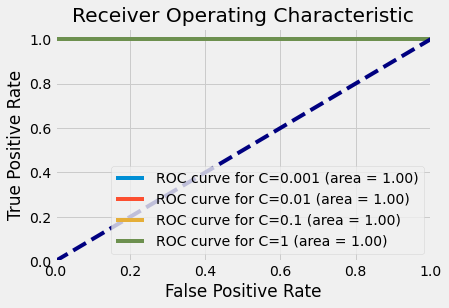

In [113]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

glass = pd.read_csv(r'C:\Users\HP\Downloads\glass.csv')
glass['household'] = glass.Type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})

X = glass.drop('household', axis=1)
y = glass['household']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

C_values = [0.001, 0.01, 0.1, 1]

plt.figure()

for C in C_values:
    logreg = LogisticRegression(C=C)
    logreg.fit(X_train, y_train)
    y_score = logreg.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='ROC curve for C={0} (area = {1:0.2f})'.format(C, roc_auc))

# Plot the random classifier
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


###### CLUSTERING #########
## 1. Repeat the above exercise for different values of k
 - How do the inertia and silhouette scores change?
 - What if you don't scale your features?
 - Is there a 'right' k? Why or why not?



Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Name, dtype: int64


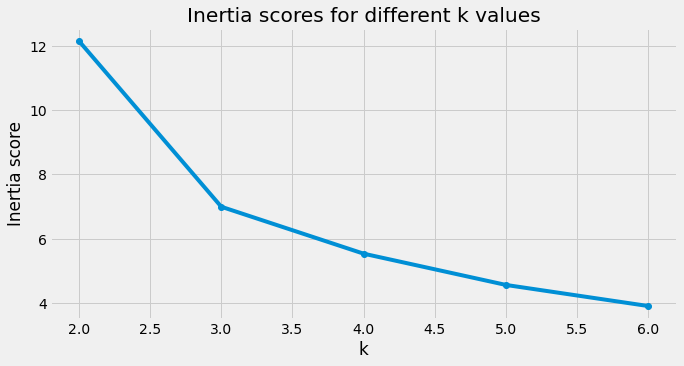

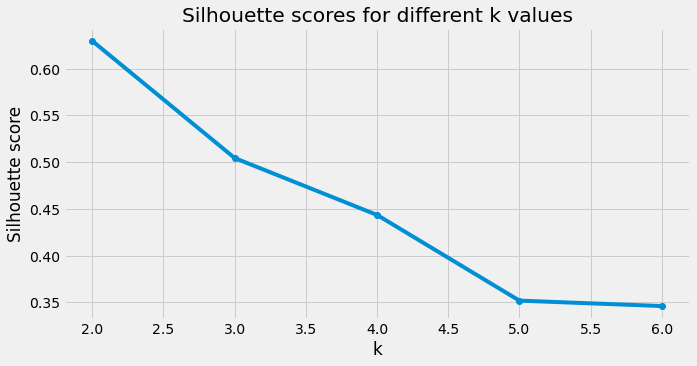

In [84]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn import cluster, datasets, preprocessing, metrics
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# Check out the dataset and our target values
df = pd.read_csv(r"C:\Users\HP\Downloads\iris.csv")

print(df['Name'].value_counts())
df.head(5)

cols = df.columns[:-1]
X_scaled = preprocessing.MinMaxScaler().fit_transform(df[cols])


k_values = [2, 3, 4, 5, 6]

inertia_scores = []
silhouette_scores = []

for k in k_values:
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(X_scaled)

    inertia_scores.append(kmeans.inertia_)
    silhouette_scores.append(metrics.silhouette_score(X_scaled, kmeans.labels_, metric='euclidean'))

plt.figure(figsize=(10, 5))
plt.plot(k_values, inertia_scores, marker='o')
plt.title('Inertia scores for different k values')
plt.xlabel('k')
plt.ylabel('Inertia score')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette scores for different k values')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.grid(True)
plt.show()


How do the inertia and silhouette scores change?

- According to the graph, the inertia score decreases as the number of clusters (k) increases. This is expected because inertia is the sum of squared distances of samples to their closest cluster center. As the number of clusters increases, the distance of each point to its assigned cluster center tends to decrease, leading to a lower inertia.

- According to the graph, the silhouette score decreases as the number of clusters (k) increases. This is because the silhouette score is a measure of how similar an object is to its own cluster compared to other clusters. A high silhouette score indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. As the number of clusters increases, each cluster becomes less distinct, leading to a lower silhouette score.

What if you don't scale your features?


- Scaling is critical in algorithms that are distance based and require Euclidean Distance, like KMeans. If scaling is not performed, features with high magnitudes will weigh in a lot more in the distance calculations than features with low magnitudes.

Is there a 'right' k? Why or why not?

- There isn’t a definitive ‘right’ value for k. It often depends on the data and the problem at hand. A common method is the Elbow Method, where the explained variation as a function of the number of clusters is plotted and the elbow point is considered as the appropriate number of clusters.

## 2. Repeat the following exercise for food nutrients dataset

           Name  Energy  Protein  Fat  Calcium  Iron
0  Braised beef     340       20   28        9   2.6
1     Hamburger     245       21   17        9   2.7
2    Roast beef     420       15   39        7   2.0
3     Beefsteak     375       19   32        9   2.6
4   Canned beef     180       22   10       17   3.7


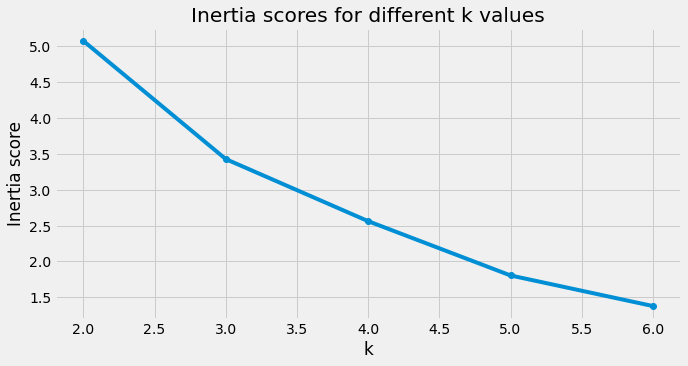

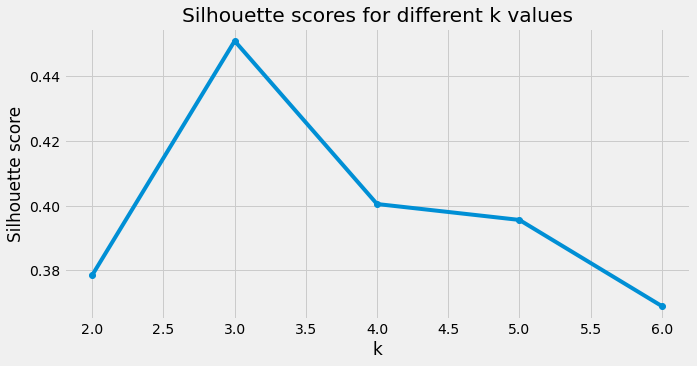

In [112]:
import pandas as pd

df = pd.read_csv("C:/Users/HP/Downloads/nutrients.txt", sep="\s+")

print(df.head())

cols = df.columns[1:]



X_scaled = preprocessing.MinMaxScaler().fit_transform(df[cols])

k_values = [2, 3, 4, 5, 6]

inertia_scores = []
silhouette_scores = []

for k in k_values:
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(X_scaled)

    inertia_scores.append(kmeans.inertia_)
    silhouette_scores.append(metrics.silhouette_score(X_scaled, kmeans.labels_, metric='euclidean'))

plt.figure(figsize=(10, 5))
plt.plot(k_values, inertia_scores, marker='o')
plt.title('Inertia scores for different k values')
plt.xlabel('k')
plt.ylabel('Inertia score')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette scores for different k values')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.grid(True)
plt.show()
